### Настройки

Начинаем с импорта библиотек

In [252]:

!pip install psycopg2

Defaulting to user installation because normal site-packages is not writeable


In [253]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

In [254]:
# хороший тон при фиксации изменений в github не публиковать код с открытыми данными для входа
# для запуска кода поместите данные, которые указаны на странице курса в эту ячейку
# при размещении в github удалите эту ячейку

In [255]:
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

Создаем соединение с заданными параметрами

In [256]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

Запрос

In [257]:
# код запроса представляет из себя строковую переменную
n = 10
query = f'''select * 
            from sql.pokemon 
            limit {n}
         '''
# лучше использовать f-строки - так удобнее передавать параметры

### Выполнение запроса

In [258]:
# Сколько вакансий есть в базе? — оптимизированная версия
if 'vacancies_table' in globals() and vacancies_table:
	vt = vacancies_table
else:
	table_lookup_query = """
		select table_schema || '.' || table_name as full_name
		from information_schema.tables
		where table_name = 'vacancies'
		  and table_schema not in ('pg_catalog', 'information_schema')
		order by full_name
	"""
	vt_df = pd.read_sql_query(table_lookup_query, connection)
	if vt_df.empty:
		raise ValueError("Таблица vacancies не найдена в пользовательских схемах базы")
	vt = vt_df.loc[0, "full_name"]

# используем COUNT(*) — быстрее, если id — PK
vacancy_count_query = f"select count(*) as vacancy_cnt from {vt}"
vacancy_count = pd.read_sql_query(vacancy_count_query, connection)
vacancy_count

C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\2383551426.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancy_count = pd.read_sql_query(vacancy_count_query, connection)


,vacancy_cnt
0,49197


In [259]:
# SQL-запрос : Сколько работодателей?
employers_table_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name = 'employers'
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
employers_tables = pd.read_sql_query(employers_table_lookup_query, connection)
if employers_tables.empty:
    raise ValueError("Таблица employers не найдена в пользовательских схемах базы")
employers_table = employers_tables.loc[0, "full_name"]
distinct_employer_count_query = f"""
    select count(distinct id) as distinct_employer_cnt
    from {employers_table}
"""
employers_distinct_count = pd.read_sql_query(distinct_employer_count_query, connection)
employers_distinct_count

C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\1904770589.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers_tables = pd.read_sql_query(employers_table_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\1904770589.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers_distinct_count = pd.read_sql_query(distinct_employer_count_query, connection)


,distinct_employer_cnt
0,23501


In [260]:
# SQL-запрос : Сколько регионов?
areas_table_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name in ('areas', 'regions')
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
areas_tables = pd.read_sql_query(areas_table_lookup_query, connection)
if areas_tables.empty:
    raise ValueError("Таблица с регионами (areas/regions) не найдена в пользовательских схемах базы")
areas_table = areas_tables.loc[0, "full_name"]
distinct_region_count_query = f"""
    select count(distinct id) as distinct_region_cnt
    from {areas_table}
"""
regions_distinct_count = pd.read_sql_query(distinct_region_count_query, connection)
regions_distinct_count

C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\625398376.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  areas_tables = pd.read_sql_query(areas_table_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\625398376.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  regions_distinct_count = pd.read_sql_query(distinct_region_count_query, connection)


,distinct_region_cnt
0,1362


In [261]:
# SQL-запрос : Сколько сфер?
industries_table_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name in ('industries', 'spheres')
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
industries_tables = pd.read_sql_query(industries_table_lookup_query, connection)
if industries_tables.empty:
    raise ValueError("Таблица с сферами (industries/spheres) не найдена в пользовательских схемах базы")
industries_table = industries_tables.loc[0, "full_name"]
distinct_industry_count_query = f"""
    select count(distinct id) as distinct_industry_cnt
    from {industries_table}
"""
industries_distinct_count = pd.read_sql_query(distinct_industry_count_query, connection)
industries_distinct_count

C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\3366515694.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  industries_tables = pd.read_sql_query(industries_table_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\3366515694.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  industries_distinct_count = pd.read_sql_query(distinct_industry_count_query, connection)


,distinct_industry_cnt
0,294


In [262]:
# SQL-запрос : сколько (cnt) вакансий в каждом регионе (area).
vacancies_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name = 'vacancies'
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
vacancies_tables = pd.read_sql_query(vacancies_lookup_query, connection)
if vacancies_tables.empty:
    raise ValueError("Таблица vacancies не найдена в пользовательских схемах базы")
vacancies_table = vacancies_tables.loc[0, "full_name"]
areas_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name in ('areas', 'regions')
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
areas_tables = pd.read_sql_query(areas_lookup_query, connection)
if areas_tables.empty:
    raise ValueError("Таблица с регионами (areas/regions) не найдена в пользовательских схемах базы")
areas_table = areas_tables.loc[0, "full_name"]
area_vacancy_top5_query = f"""
    select a.id as area_id,
           a.name as area_name,
           count(distinct v.id) as vacancy_cnt
    from {areas_table} a
    join {vacancies_table} v
      on v.area_id = a.id
    group by a.id, a.name
    order by vacancy_cnt desc, area_name
    limit 5
"""
area_vacancy_top5 = pd.read_sql_query(area_vacancy_top5_query, connection)
area_vacancy_top5

C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\2751800889.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancies_tables = pd.read_sql_query(vacancies_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\2751800889.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  areas_tables = pd.read_sql_query(areas_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\2751800889.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  area_vacancy_top5 = pd.read_sql_query(area_vacancy_top5_

,area_id,area_name,vacancy_cnt
0,1,Москва,5333
1,2,Санкт-Петербург,2851
2,1002,Минск,2112
3,4,Новосибирск,2006
4,160,Алматы,1892


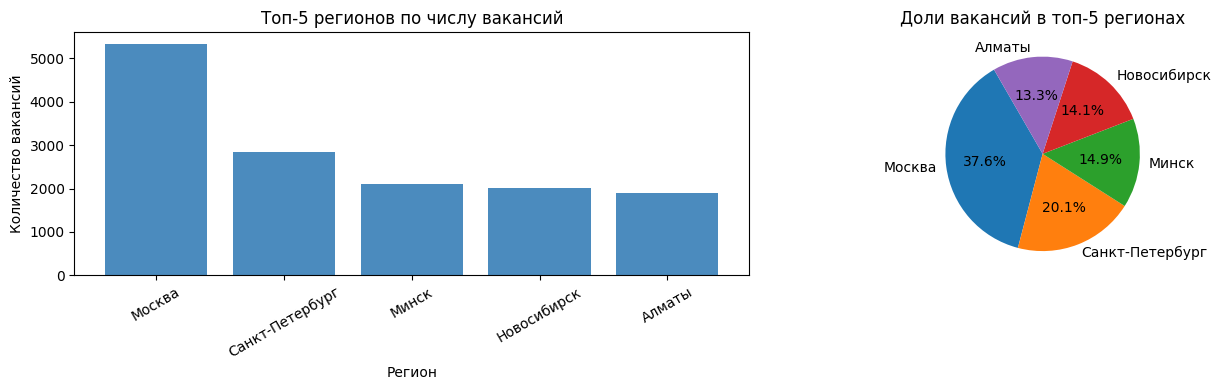

In [263]:
# Визуализации запроса распределения
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].bar(area_vacancy_top5["area_name"], area_vacancy_top5["vacancy_cnt"], color="#4B8BBE")
axes[0].set_title("Топ-5 регионов по числу вакансий")
axes[0].set_xlabel("Регион")
axes[0].set_ylabel("Количество вакансий")
axes[0].tick_params(axis="x", rotation=30)

axes[1].pie(area_vacancy_top5["vacancy_cnt"], labels=area_vacancy_top5["area_name"], autopct="%1.1f%%", startangle=120)
axes[1].set_title("Доли вакансий в топ-5 регионах")

plt.tight_layout()
plt.show()

In [264]:
# SQL-запрос : У какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой?
vacancies_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name = 'vacancies'
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
vacancies_tables = pd.read_sql_query(vacancies_lookup_query, connection)
if vacancies_tables.empty:
    raise ValueError("Таблица vacancies не найдена в пользовательских схемах базы")
vacancies_table = vacancies_tables.loc[0, "full_name"]
salary_filled_query = f"""
    select count(distinct id) as vacancy_with_salary_cnt
    from {vacancies_table}
    where salary_from is not null
       or salary_to   is not null
"""
vacancies_with_salary = pd.read_sql_query(salary_filled_query, connection)
vacancies_with_salary

C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\2696714630.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancies_tables = pd.read_sql_query(vacancies_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\2696714630.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancies_with_salary = pd.read_sql_query(salary_filled_query, connection)


,vacancy_with_salary_cnt
0,24073


In [265]:
# SQL-запрос : Найдите средние значения для нижней и верхней границы зарплатной вилки.
vacancies_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name = 'vacancies'
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
vacancies_tables = pd.read_sql_query(vacancies_lookup_query, connection)
if vacancies_tables.empty:
    raise ValueError("Таблица vacancies не найдена в пользовательских схемах базы")
vacancies_table = vacancies_tables.loc[0, "full_name"]
salary_avg_query = f"""
    with distinct_vacancies as (
        select distinct id, salary_from, salary_to
        from {vacancies_table}
        where salary_from is not null
           or salary_to   is not null
    )
    select round(avg(salary_from)) as avg_salary_from,
           round(avg(salary_to))   as avg_salary_to
    from distinct_vacancies
"""
salary_avg_df = pd.read_sql_query(salary_avg_query, connection)
salary_avg_df

C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\2793847675.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancies_tables = pd.read_sql_query(vacancies_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\2793847675.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_avg_df = pd.read_sql_query(salary_avg_query, connection)


,avg_salary_from,avg_salary_to
0,71065.0,110537.0


In [266]:
# Задание 8 SQL-запрос : Количество вакансий по сочетанию schedule и employment
vacancies_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name = 'vacancies'
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
vacancies_tables = pd.read_sql_query(vacancies_lookup_query, connection)
if vacancies_tables.empty:
    raise ValueError("Таблица vacancies не найдена в пользовательских схемах базы")
vacancies_table = vacancies_tables.loc[0, "full_name"]
schedule_employment_query = f"""
    select coalesce(schedule, 'unknown') as schedule_type,
           coalesce(employment, 'unknown') as employment_type,
           count(distinct id)            as vacancy_cnt
    from {vacancies_table}
    group by schedule_type, employment_type
    order by vacancy_cnt desc, schedule_type, employment_type
"""
schedule_employment_df = pd.read_sql_query(schedule_employment_query, connection)
schedule_employment_df

C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\2481354679.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancies_tables = pd.read_sql_query(vacancies_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\2481354679.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schedule_employment_df = pd.read_sql_query(schedule_employment_query, connection)


,schedule_type,employment_type,vacancy_cnt
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


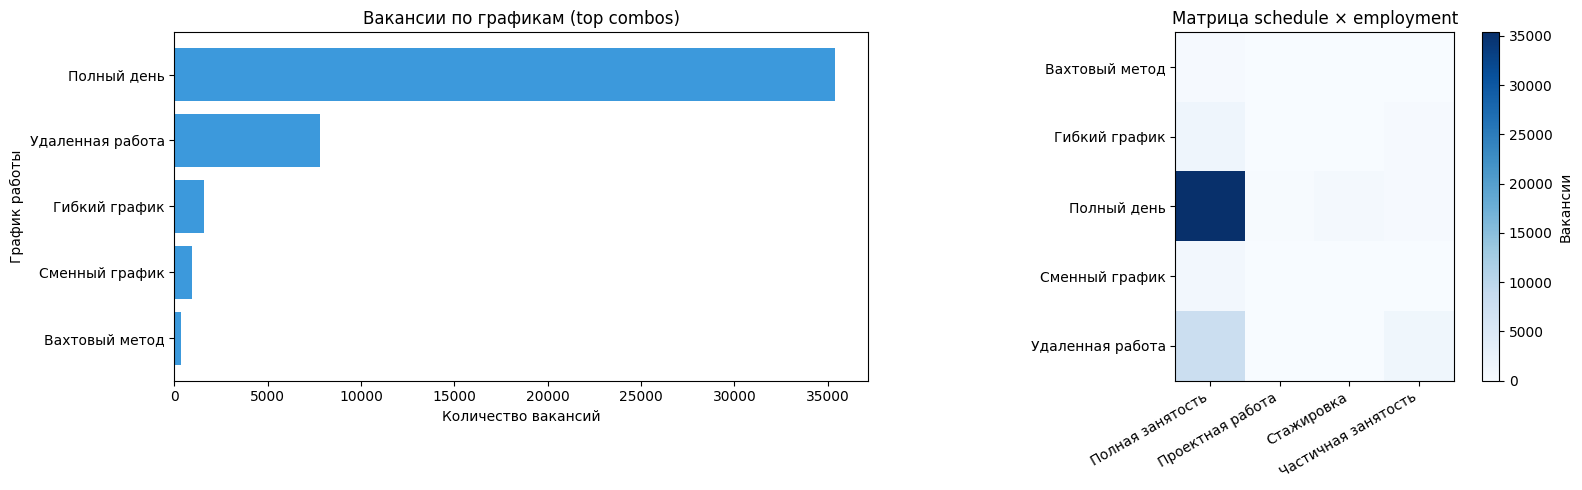

In [267]:
# Визуализация распределения
if 'schedule_employment_df' not in globals():
    raise ValueError("Перед визуализацией выполните ячейку задания 8, чтобы сформировать schedule_employment_df")

viz_df = schedule_employment_df.copy()
viz_df = viz_df.sort_values("vacancy_cnt", ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].barh(viz_df["schedule_type"], viz_df["vacancy_cnt"], color="#3C99DC")
axes[0].invert_yaxis()
axes[0].set_title("Вакансии по графикам (top combos)")
axes[0].set_xlabel("Количество вакансий")
axes[0].set_ylabel("График работы")

heatmap_data = schedule_employment_df.pivot(index="schedule_type", columns="employment_type", values="vacancy_cnt").fillna(0)
im = axes[1].imshow(heatmap_data, cmap="Blues")
axes[1].set_title("Матрица schedule × employment")
axes[1].set_xticks(range(len(heatmap_data.columns)))
axes[1].set_xticklabels(heatmap_data.columns, rotation=30, ha="right")
axes[1].set_yticks(range(len(heatmap_data.index)))
axes[1].set_yticklabels(heatmap_data.index)
fig.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04, label="Вакансии")

plt.tight_layout()
plt.show()

In [268]:
# SQL-запрос : Требуемый опыт работы по возрастанию числа вакансий
vacancies_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name = 'vacancies'
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
vacancies_tables = pd.read_sql_query(vacancies_lookup_query, connection)
if vacancies_tables.empty:
    raise ValueError("Таблица vacancies не найдена в пользовательских схемах базы")
vacancies_table = vacancies_tables.loc[0, "full_name"]
experience_order_query = f"""
    select coalesce(experience, 'unknown') as experience_value,
           count(distinct id)             as vacancy_cnt
    from {vacancies_table}
    group by experience_value
    order by vacancy_cnt asc, experience_value
"""
experience_order_df = pd.read_sql_query(experience_order_query, connection)
experience_order_df

C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\176834901.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancies_tables = pd.read_sql_query(vacancies_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\176834901.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  experience_order_df = pd.read_sql_query(experience_order_query, connection)


,experience_value,vacancy_cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


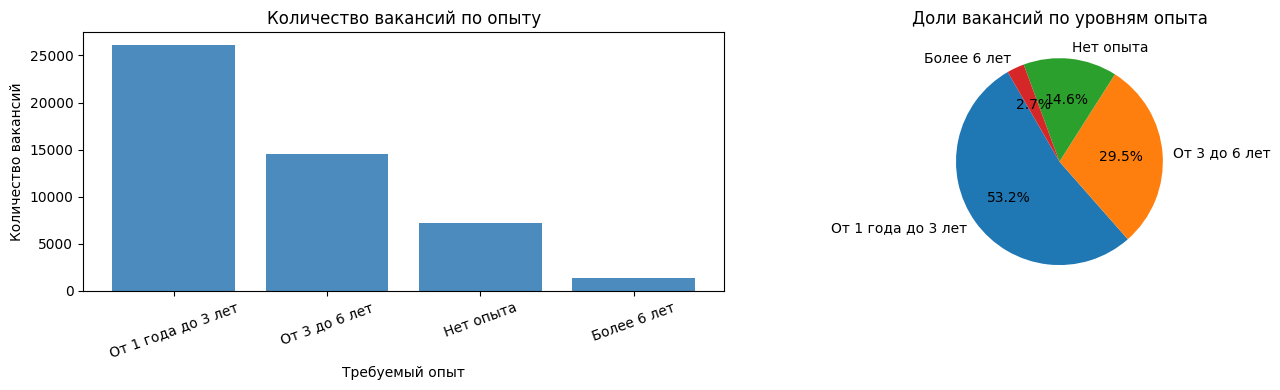

In [269]:
# Визуализация распределения требуемого опыта
if 'experience_order_df' not in globals():
    raise ValueError("Сначала выполните ячейку задания 9, чтобы построить визуализацию")

viz_df = experience_order_df.copy().sort_values("vacancy_cnt", ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].bar(viz_df["experience_value"], viz_df["vacancy_cnt"], color="#4B8BBE")
axes[0].set_title("Количество вакансий по опыту")
axes[0].set_xlabel("Требуемый опыт")
axes[0].set_ylabel("Количество вакансий")
axes[0].tick_params(axis="x", rotation=20)

axes[1].pie(
    viz_df["vacancy_cnt"],
    labels=viz_df["experience_value"],
    autopct="%1.1f%%",
    startangle=120
 )
axes[1].set_title("Доли вакансий по уровням опыта")

plt.tight_layout()
plt.show()

In [270]:
# SQL-запрос : какие работодатели находятся на первом и пятом месте по количеству вакансий
vacancies_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name = 'vacancies'
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
vacancies_tables = pd.read_sql_query(vacancies_lookup_query, connection)
if vacancies_tables.empty:
    raise ValueError("Таблица vacancies не найдена в пользовательских схемах базы")
vacancies_table = vacancies_tables.loc[0, "full_name"]
employers_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name = 'employers'
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
employers_tables = pd.read_sql_query(employers_lookup_query, connection)
if employers_tables.empty:
    raise ValueError("Таблица employers не найдена в пользовательских схемах базы")
employers_table = employers_tables.loc[0, "full_name"]
employer_rank_query = f"""
    with employer_counts as (
        select e.id,
               e.name,
               count(distinct v.id) as vacancy_cnt,
               dense_rank() over (order by count(distinct v.id) desc) as vacancy_rank
        from {employers_table} e
        join {vacancies_table} v
          on v.employer_id = e.id
        group by e.id, e.name
    )
    select id, name, vacancy_cnt, vacancy_rank
    from employer_counts
    where vacancy_rank in (1, 5)
    order by vacancy_rank, name
"""
employer_rank_df = pd.read_sql_query(employer_rank_query, connection)
employer_rank_df

C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\419248622.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancies_tables = pd.read_sql_query(vacancies_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\419248622.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers_tables = pd.read_sql_query(employers_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\419248622.py:40: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employer_rank_df = pd.read_sql_query(employer_rank_

,id,name,vacancy_cnt,vacancy_rank
0,1740,Яндекс,1933,1
1,39305,Газпром нефть,331,5


In [271]:
# SQL-запрос : Количество работодателей и вакансий по регионам + лидер среди регионов без вакансий
def detect_area_column(full_table_name, candidates):
    schema_name, table_name = full_table_name.split('.', 1)
    column_lookup_query = f"""
        select column_name
        from information_schema.columns
        where table_schema = '{schema_name}'
          and table_name = '{table_name}'
    """
    columns_df = pd.read_sql_query(column_lookup_query, connection)
    if columns_df.empty:
        raise ValueError(f"Не удалось получить столбцы для таблицы {full_table_name}")
    available = {col.lower(): col for col in columns_df["column_name"]}
    for candidate in candidates:
        if candidate.lower() in available:
            return available[candidate.lower()]
    raise ValueError(f"Не найден столбец со ссылкой на регион среди {candidates} в таблице {full_table_name}")
vacancies_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name = 'vacancies'
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
vacancies_tables = pd.read_sql_query(vacancies_lookup_query, connection)
if vacancies_tables.empty:
    raise ValueError("Таблица vacancies не найдена в пользовательских схемах базы")
vacancies_table = vacancies_tables.loc[0, "full_name"]
employers_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name = 'employers'
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
employers_tables = pd.read_sql_query(employers_lookup_query, connection)
if employers_tables.empty:
    raise ValueError("Таблица employers не найдена в пользовательских схемах базы")
employers_table = employers_tables.loc[0, "full_name"]
areas_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name in ('areas', 'regions')
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
areas_tables = pd.read_sql_query(areas_lookup_query, connection)
if areas_tables.empty:
    raise ValueError("Таблица с регионами (areas/regions) не найдена в пользовательских схемах базы")
areas_table = areas_tables.loc[0, "full_name"]
employer_area_column = detect_area_column(employers_table, ["area_id", "region_id", "area", "region"])
vacancy_area_column = detect_area_column(vacancies_table, ["area_id", "region_id", "area", "region"])
# Используем общее CTE, чтобы не дублировать вычисления при двух запросах
region_stats_cte = f"""
    with area_stats as (
        select a.id   as area_id,
               a.name as area_name,
               coalesce(ec.employer_cnt, 0) as employer_cnt,
               coalesce(vc.vacancy_cnt, 0)  as vacancy_cnt
        from {areas_table} a
        left join (
            select {employer_area_column} as area_id,
                   count(distinct id)       as employer_cnt
            from {employers_table}
            group by {employer_area_column}
        ) ec
          on ec.area_id = a.id
        left join (
            select {vacancy_area_column} as area_id,
                   count(distinct id)      as vacancy_cnt
            from {vacancies_table}
            group by {vacancy_area_column}
        ) vc
          on vc.area_id = a.id
    )
"""
region_stats_query = f"""
    {region_stats_cte}
    select area_id, area_name, employer_cnt, vacancy_cnt
    from area_stats
    order by vacancy_cnt desc, employer_cnt desc, area_name
"""
region_stats_df = pd.read_sql_query(region_stats_query, connection)
region_stats_df
region_no_vac_leader_query = f"""
    {region_stats_cte}
    select area_id, area_name, employer_cnt
    from area_stats
    where vacancy_cnt = 0
    order by employer_cnt desc, area_name
    limit 1
"""
region_no_vac_leader_df = pd.read_sql_query(region_no_vac_leader_query, connection)
region_no_vac_leader_df

C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\2687909774.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancies_tables = pd.read_sql_query(vacancies_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\2687909774.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers_tables = pd.read_sql_query(employers_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\2687909774.py:47: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  areas_tables = pd.read_sql_query(areas_lookup_q

,area_id,area_name,employer_cnt
0,113,Россия,410


In [272]:
# SQL-запрос : Максимальное число регионов, в которых работодатель публикует вакансии
vacancies_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name = 'vacancies'
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
vacancies_tables = pd.read_sql_query(vacancies_lookup_query, connection)
if vacancies_tables.empty:
    raise ValueError("Таблица vacancies не найдена в пользовательских схемах базы")
vacancies_table = vacancies_tables.loc[0, "full_name"]
employers_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name = 'employers'
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
employers_tables = pd.read_sql_query(employers_lookup_query, connection)
if employers_tables.empty:
    raise ValueError("Таблица employers не найдена в пользовательских схемах базы")
employers_table = employers_tables.loc[0, "full_name"]
def detect_area_column(full_table_name, candidates):
    schema_name, table_name = full_table_name.split('.', 1)
    column_lookup_query = f"""
        select column_name
        from information_schema.columns
        where table_schema = '{schema_name}'
          and table_name = '{table_name}'
    """
    columns_df = pd.read_sql_query(column_lookup_query, connection)
    if columns_df.empty:
        raise ValueError(f"Не удалось получить столбцы для таблицы {full_table_name}")
    available = {col.lower(): col for col in columns_df["column_name"]}
    for candidate in candidates:
        if candidate.lower() in available:
            return available[candidate.lower()]
    raise ValueError(f"Не найден столбец со ссылкой на регион среди {candidates} в таблице {full_table_name}")
vacancy_area_column = detect_area_column(vacancies_table, ["area_id", "region_id", "area", "region"])
vacancy_employer_column = detect_area_column(vacancies_table, ["employer_id", "company_id", "employer"])
employer_region_count_query = f"""
    with employer_regions as (
        select {vacancy_employer_column} as employer_id,
               count(distinct {vacancy_area_column}) as region_cnt
        from {vacancies_table}
        where {vacancy_employer_column} is not null
          and {vacancy_area_column}    is not null
        group by {vacancy_employer_column}
    )
    select e.id, e.name, er.region_cnt
    from employer_regions er
    join {employers_table} e
      on e.id = er.employer_id
    order by er.region_cnt desc, e.name
"""
employer_region_count_df = pd.read_sql_query(employer_region_count_query, connection)
employer_region_count_df
max_regions_query = f"""
    with employer_regions as (
        select {vacancy_employer_column} as employer_id,
               count(distinct {vacancy_area_column}) as region_cnt
        from {vacancies_table}
        where {vacancy_employer_column} is not null
          and {vacancy_area_column}    is not null
        group by {vacancy_employer_column}
    )
    select max(region_cnt) as max_region_cnt
    from employer_regions
"""
max_regions_df = pd.read_sql_query(max_regions_query, connection)
max_regions_df

C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\4147454133.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancies_tables = pd.read_sql_query(vacancies_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\4147454133.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers_tables = pd.read_sql_query(employers_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\4147454133.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  columns_df = pd.read_sql_query(column_lookup_que

,max_region_cnt
0,181


In [273]:
# SQL-запрос : Количество работодателей без указанных сфер деятельности
employers_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name = 'employers'
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
employers_tables = pd.read_sql_query(employers_lookup_query, connection)
if employers_tables.empty:
    raise ValueError("Таблица employers не найдена в пользовательских схемах базы")
employers_table = employers_tables.loc[0, "full_name"]
emp_industries_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name in ('employer_industries', 'employers_industries', 'employer_industry')
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
emp_industries_tables = pd.read_sql_query(emp_industries_lookup_query, connection)
if emp_industries_tables.empty:
    raise ValueError("Не найдена таблица связей работодателей и сфер (employer_industries)")
employer_industries_table = emp_industries_tables.loc[0, "full_name"]
def detect_column(full_table_name, candidates):
    schema_name, table_name = full_table_name.split('.', 1)
    column_lookup_query = f"""
        select column_name
        from information_schema.columns
        where table_schema = '{schema_name}'
          and table_name = '{table_name}'
    """
    columns_df = pd.read_sql_query(column_lookup_query, connection)
    if columns_df.empty:
        raise ValueError(f"Не удалось получить столбцы для таблицы {full_table_name}")
    available = {col.lower(): col for col in columns_df["column_name"]}
    for candidate in candidates:
        if candidate.lower() in available:
            return available[candidate.lower()]
    raise ValueError(f"Не найден нужный столбец среди {candidates} в таблице {full_table_name}")
link_employer_column = detect_column(employer_industries_table, ["employer_id", "company_id", "employer"])
employers_without_industries_cte = f"""
    with employer_has_industry as (
        select distinct {link_employer_column} as employer_id
        from {employer_industries_table}
        where {link_employer_column} is not null
    )
"""
employers_without_industries_list_query = f"""
    {employers_without_industries_cte}
    select e.id, e.name
    from {employers_table} e
    left join employer_has_industry ehi
      on ehi.employer_id = e.id
    where ehi.employer_id is null
    order by e.name
"""
employers_without_industries_df = pd.read_sql_query(employers_without_industries_list_query, connection)
employers_without_industries_df
employers_without_industries_count_query = f"""
    {employers_without_industries_cte}
    select count(distinct e.id) as employers_without_industries_cnt
    from {employers_table} e
    left join employer_has_industry ehi
      on ehi.employer_id = e.id
    where ehi.employer_id is null
"""
employers_without_industries_count_df = pd.read_sql_query(employers_without_industries_count_query, connection)
employers_without_industries_count_df

C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\37479001.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers_tables = pd.read_sql_query(employers_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\37479001.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  emp_industries_tables = pd.read_sql_query(emp_industries_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\37479001.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  columns_df = pd.read_sql_query(column_lookup

,employers_without_industries_cnt
0,8419


In [274]:
# SQL-запрос : Третья по алфавиту компания с четырьмя сферами деятельности
employers_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name = 'employers'
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
employers_tables = pd.read_sql_query(employers_lookup_query, connection)
if employers_tables.empty:
    raise ValueError("Таблица employers не найдена в пользовательских схемах базы")
employers_table = employers_tables.loc[0, "full_name"]
emp_industries_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name in ('employer_industries', 'employers_industries', 'employer_industry')
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
emp_industries_tables = pd.read_sql_query(emp_industries_lookup_query, connection)
if emp_industries_tables.empty:
    raise ValueError("Не найдена таблица связей работодателей и сфер (employer_industries)")
employer_industries_table = emp_industries_tables.loc[0, "full_name"]
def detect_column(full_table_name, candidates):
    schema_name, table_name = full_table_name.split('.', 1)
    column_lookup_query = f"""
        select column_name
        from information_schema.columns
        where table_schema = '{schema_name}'
          and table_name = '{table_name}'
    """
    columns_df = pd.read_sql_query(column_lookup_query, connection)
    if columns_df.empty:
        raise ValueError(f"Не удалось получить столбцы для таблицы {full_table_name}")
    available = {col.lower(): col for col in columns_df["column_name"]}
    for candidate in candidates:
        if candidate.lower() in available:
            return available[candidate.lower()]
    raise ValueError(f"Не найден столбец среди {candidates} в таблице {full_table_name}")
link_employer_column = detect_column(employer_industries_table, ["employer_id", "company_id", "employer"])
link_industry_column = detect_column(employer_industries_table, ["industry_id", "sphere_id", "industry", "sphere"])
companies_four_industries_query = f"""
    with employer_industry_counts as (
        select {link_employer_column} as employer_id,
               count(distinct {link_industry_column}) as industry_cnt
        from {employer_industries_table}
        where {link_employer_column} is not null
          and {link_industry_column} is not null
        group by {link_employer_column}
        having count(distinct {link_industry_column}) = 4
    )
    select e.id, e.name
    from employer_industry_counts eic
    join {employers_table} e
      on e.id = eic.employer_id
    order by e.name
"""
companies_four_industries_df = pd.read_sql_query(companies_four_industries_query, connection)
companies_four_industries_df
third_company_query = f"""
    with employer_industry_counts as (
        select {link_employer_column} as employer_id,
               count(distinct {link_industry_column}) as industry_cnt
        from {employer_industries_table}
        where {link_employer_column} is not null
          and {link_industry_column} is not null
        group by {link_employer_column}
        having count(distinct {link_industry_column}) = 4
    )
    select e.name
    from employer_industry_counts eic
    join {employers_table} e
      on e.id = eic.employer_id
    order by e.name
    offset 2
    limit 1
"""
third_company_df = pd.read_sql_query(third_company_query, connection)
third_company_df

C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\3379613539.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers_tables = pd.read_sql_query(employers_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\3379613539.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  emp_industries_tables = pd.read_sql_query(emp_industries_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\3379613539.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  columns_df = pd.read_sql_query(column_

,name
0,2ГИС


In [275]:
# SQL-запрос : Количество работодателей с сферой «Разработка программного обеспечения»
employers_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name = 'employers'
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
employers_tables = pd.read_sql_query(employers_lookup_query, connection)
if employers_tables.empty:
    raise ValueError("Таблица employers не найдена в пользовательских схемах базы")
employers_table = employers_tables.loc[0, "full_name"]
industries_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name in ('industries', 'spheres')
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
industries_tables = pd.read_sql_query(industries_lookup_query, connection)
if industries_tables.empty:
    raise ValueError("Таблица industries/spheres не найдена в пользовательских схемах базы")
industries_table = industries_tables.loc[0, "full_name"]
emp_industries_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name in ('employer_industries', 'employers_industries', 'employer_industry')
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
emp_industries_tables = pd.read_sql_query(emp_industries_lookup_query, connection)
if emp_industries_tables.empty:
    raise ValueError("Не найдена таблица связей работодателей и сфер (employer_industries)")
employer_industries_table = emp_industries_tables.loc[0, "full_name"]
def detect_column(full_table_name, candidates):
    schema_name, table_name = full_table_name.split('.', 1)
    column_lookup_query = f"""
        select column_name
        from information_schema.columns
        where table_schema = '{schema_name}'
          and table_name = '{table_name}'
    """
    columns_df = pd.read_sql_query(column_lookup_query, connection)
    if columns_df.empty:
        raise ValueError(f"Не удалось получить столбцы для таблицы {full_table_name}")
    available = {col.lower(): col for col in columns_df["column_name"]}
    for candidate in candidates:
        if candidate.lower() in available:
            return available[candidate.lower()]
    raise ValueError(f"Не найден столбец среди {candidates} в таблице {full_table_name}")
link_employer_column = detect_column(employer_industries_table, ["employer_id", "company_id", "employer"])
link_industry_column = detect_column(employer_industries_table, ["industry_id", "sphere_id", "industry", "sphere"])
industry_name_column = detect_column(industries_table, ["name", "title", "industry_name"])
target_industry = "Разработка программного обеспечения"
employers_with_target_industry_query = f"""
    select distinct e.id, e.name
    from {employers_table} e
    join {employer_industries_table} ei
      on ei.{link_employer_column} = e.id
    join {industries_table} i
      on i.id = ei.{link_industry_column}
    where i.{industry_name_column} = %(target_industry)s
    order by e.name
"""
employers_with_target_industry_df = pd.read_sql_query(
    employers_with_target_industry_query,
    connection,
    params={"target_industry": target_industry}
 )
employers_with_target_industry_df
employers_with_target_industry_count_query = f"""
    select count(distinct e.id) as employer_with_target_industry_cnt
    from {employers_table} e
    join {employer_industries_table} ei
      on ei.{link_employer_column} = e.id
    join {industries_table} i
      on i.id = ei.{link_industry_column}
    where i.{industry_name_column} = %(target_industry)s
"""
employers_with_target_industry_count_df = pd.read_sql_query(
    employers_with_target_industry_count_query,
    connection,
    params={"target_industry": target_industry}
 )
employers_with_target_industry_count_df

C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\404170215.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers_tables = pd.read_sql_query(employers_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\404170215.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  industries_tables = pd.read_sql_query(industries_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\404170215.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  emp_industries_tables = pd.read_sql_query(emp_ind

,employer_with_target_industry_cnt
0,3553


In [276]:
# SQL-запрос : Города-миллионники с вакансиями «Яндекс».

target_employer_name = "Яндекс"
fallback_million_cities = [
    "Москва","Санкт-Петербург","Новосибирск","Екатеринбург","Казань", "Красноярск",
    "Нижний Новгород", "Челябинск", "Уфа", "Краснодар", "Самара", "Ростов-на-Дону",
    "Омск", "Воронеж", "Пермь", "Волгоград"
]

def detect_column(full_table_name, candidates):
    schema_name, table_name = full_table_name.split('.', 1)
    column_lookup_query = f"""
        select column_name
        from information_schema.columns
        where table_schema = '{schema_name}'
          and table_name = '{table_name}'
    """
    columns_df = pd.read_sql_query(column_lookup_query, connection)
    if columns_df.empty:
        raise ValueError(f"Не удалось получить столбцы для таблицы {full_table_name}")
    available = {col.lower(): col for col in columns_df["column_name"]}
    for candidate in candidates:
        if candidate.lower() in available:
            return available[candidate.lower()]
    return None

vacancies_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name = 'vacancies'
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
vacancies_tables = pd.read_sql_query(vacancies_lookup_query, connection)
if vacancies_tables.empty:
    raise ValueError("Таблица vacancies не найдена в пользовательских схемах базы")
vacancies_table = vacancies_tables.loc[0, "full_name"]

employers_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name = 'employers'
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
employers_tables = pd.read_sql_query(employers_lookup_query, connection)
if employers_tables.empty:
    raise ValueError("Таблица employers не найдена в пользовательских схемах базы")
employers_table = employers_tables.loc[0, "full_name"]

areas_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name in ('areas', 'regions')
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
areas_tables = pd.read_sql_query(areas_lookup_query, connection)
if areas_tables.empty:
    raise ValueError("Таблица с регионами (areas/regions) не найдена в пользовательских схемах базы")
areas_table = areas_tables.loc[0, "full_name"]

vacancy_area_column = detect_column(vacancies_table, ["area_id", "region_id", "area", "region"])
if not vacancy_area_column:
    raise ValueError("Не найден столбец региона в таблице vacancies")

vacancy_employer_column = detect_column(vacancies_table, ["employer_id", "company_id", "employer"])
if not vacancy_employer_column:
    raise ValueError("Не найден столбец работодателя в таблице vacancies")

area_name_column = detect_column(areas_table, ["name", "title", "area_name"])
if not area_name_column:
    raise ValueError("Не найден столбец названия региона в таблице areas/regions")

area_population_column = detect_column(areas_table, ["population", "population_cnt", "population_count", "people", "citizens"])
million_flag_column = detect_column(areas_table, ["is_million", "is_million_city", "million_flag", "million_plus"])

million_condition = ""
if million_flag_column:
    million_condition = f"a.{million_flag_column} = true"
elif area_population_column:
    million_condition = f"a.{area_population_column} >= 1000000"
else:
    city_list_literal = ", ".join("'" + city.lower().replace("'", "''") + "'" for city in fallback_million_cities)
    million_condition = f"lower(a.{area_name_column}) in ({city_list_literal})"

yandex_city_vacancies_query = f"""
    with target_employer as (
        select id
        from {employers_table}
        where lower(name) = lower(%(target_employer)s)
        limit 1
    ),
    city_vacancies as (
        select v.{vacancy_area_column} as area_id,
               count(distinct v.id)     as vacancy_cnt
        from {vacancies_table} v
        join target_employer te
          on te.id = v.{vacancy_employer_column}
        join {areas_table} a
          on a.id = v.{vacancy_area_column}
        where {million_condition}
          and v.{vacancy_area_column} is not null
        group by v.{vacancy_area_column}
    ),
    detailed_rows as (
        select a.{area_name_column} as area_name,
               cv.vacancy_cnt
        from city_vacancies cv
        join {areas_table} a
          on a.id = cv.area_id
    ),
    ordered_rows as (
        select area_name, vacancy_cnt, 0 as total_order
        from detailed_rows
        union all
        select 'Total' as area_name, sum(vacancy_cnt) as vacancy_cnt, 1 as total_order
        from detailed_rows
    )
    select area_name, vacancy_cnt
    from ordered_rows
    order by total_order, area_name
"""

params = {"target_employer": target_employer_name}
yandex_city_vacancies_df = pd.read_sql_query(
    yandex_city_vacancies_query,
    connection,
    params=params
)
yandex_city_vacancies_df

C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\788499639.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancies_tables = pd.read_sql_query(vacancies_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\788499639.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers_tables = pd.read_sql_query(employers_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\788499639.py:58: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  areas_tables = pd.read_sql_query(areas_lookup_quer

,area_name,vacancy_cnt
0,Волгоград,24.0
1,Воронеж,32.0
2,Екатеринбург,39.0
3,Казань,25.0
4,Краснодар,30.0
5,Красноярск,23.0
6,Москва,54.0
7,Нижний Новгород,36.0
8,Новосибирск,35.0
9,Омск,21.0


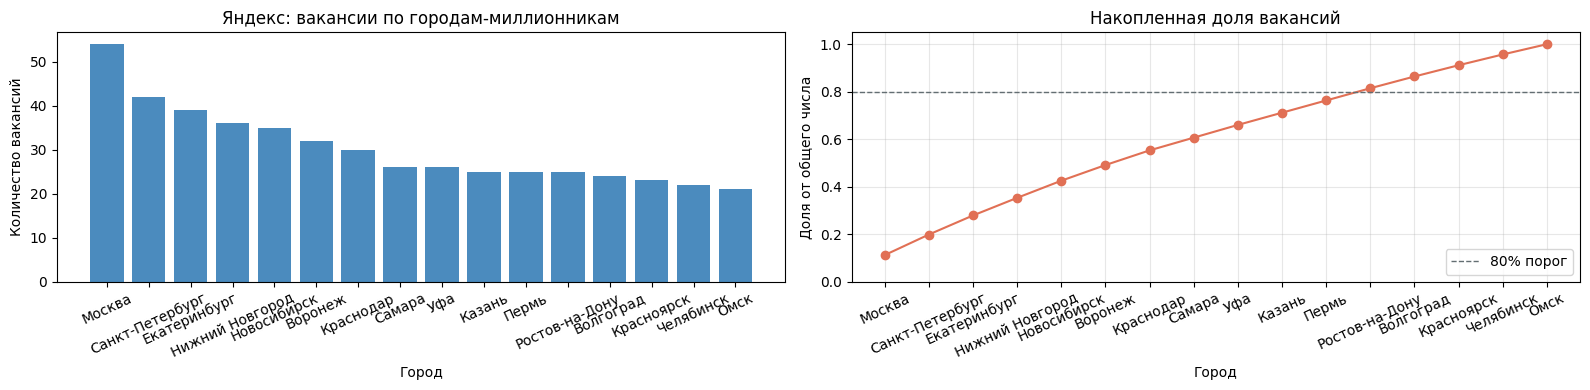

In [277]:
# Визуализация распределения по городам-миллионникам
if 'yandex_city_vacancies_df' not in globals():
    raise ValueError("Сначала выполните ячейку задания 16, чтобы получить yandex_city_vacancies_df")

viz_df = (
    yandex_city_vacancies_df[yandex_city_vacancies_df["area_name"] != "Total"]
    .copy()
    .sort_values("vacancy_cnt", ascending=False)
 )

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

axes[0].bar(viz_df["area_name"], viz_df["vacancy_cnt"], color="#4B8BBE")
axes[0].set_title("Яндекс: вакансии по городам-миллионникам")
axes[0].set_xlabel("Город")
axes[0].set_ylabel("Количество вакансий")
axes[0].tick_params(axis="x", rotation=25)

share_df = viz_df.assign(share=viz_df["vacancy_cnt"] / viz_df["vacancy_cnt"].sum())
share_df["cum_share"] = share_df["share"].cumsum()

axes[1].plot(share_df["area_name"], share_df["cum_share"], marker="o", color="#E17055")
axes[1].axhline(0.8, color="#636E72", linestyle="--", linewidth=1, label="80% порог")
axes[1].set_ylim(0, 1.05)
axes[1].set_title("Накопленная доля вакансий")
axes[1].set_xlabel("Город")
axes[1].set_ylabel("Доля от общего числа")
axes[1].tick_params(axis="x", rotation=25)
axes[1].grid(alpha=0.3)
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

In [278]:
# SQL-запрос : Сколько вакансий имеет отношение к данным?

data_keywords = [
    "%данн%",  # русскоязычные вхождения (данные, аналитик данных и т.д.)
    "%data%"   # англоязычные вхождения
]

def detect_column(full_table_name, candidates):
    schema_name, table_name = full_table_name.split('.', 1)
    column_lookup_query = f"""
        select column_name
        from information_schema.columns
        where table_schema = '{schema_name}'
          and table_name   = '{table_name}'
    """
    columns_df = pd.read_sql_query(column_lookup_query, connection)
    if columns_df.empty:
        raise ValueError(f"Не удалось получить столбцы для таблицы {full_table_name}")
    available = {col.lower(): col for col in columns_df["column_name"]}
    for candidate in candidates:
        if candidate.lower() in available:
            return available[candidate.lower()]
    raise ValueError(f"Не найден нужный столбец среди {candidates} в таблице {full_table_name}")

vacancies_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name = 'vacancies'
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
vacancies_tables = pd.read_sql_query(vacancies_lookup_query, connection)
if vacancies_tables.empty:
    raise ValueError("Таблица vacancies не найдена в пользовательских схемах базы")
vacancies_table = vacancies_tables.loc[0, "full_name"]

vacancy_name_column = detect_column(vacancies_table, ["name", "title", "vacancy_name"])

pattern_conditions = []
pattern_params = {}
for idx, pattern in enumerate(data_keywords):
    param_name = f"pattern_{idx}"
    pattern_conditions.append(f"v.{vacancy_name_column} ILIKE %({param_name})s")
    pattern_params[param_name] = pattern

if not pattern_conditions:
    raise ValueError("Не заданы шаблоны для поиска вакансий, связанных с данными")

where_clause = " OR ".join(pattern_conditions)

data_related_vacancies_query = f"""
    with data_vacancies as (
        select distinct v.id
        from {vacancies_table} v
        where v.{vacancy_name_column} is not null
          and ({where_clause})
    )
    select count(*) as data_related_vacancy_cnt
    from data_vacancies
"""

data_related_vacancies_df = pd.read_sql_query(
    data_related_vacancies_query,
    connection,
    params=pattern_params
)
data_related_vacancies_df

C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\3409012056.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancies_tables = pd.read_sql_query(vacancies_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\3409012056.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  columns_df = pd.read_sql_query(column_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\3409012056.py:62: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_related_vacancies_df = pd.read_sql_query(


,data_related_vacancy_cnt
0,1771


In [279]:
# SQL-запрос : Сколько есть подходящих вакансий для начинающего дата-сайентиста.

data_science_like_patterns = [
    "%data scientist%",
    "%data science%",
    "%исследователь данных%",
    "%machine learning%",
    "%машинн%обучен%"
]
ml_boundary_regex = r"(^|[^a-zA-Z0-9])ml([^a-zA-Z0-9]|$)"  # избегаем HTML, требуя отдельное слово ML

def detect_column(full_table_name, candidates):
    schema_name, table_name = full_table_name.split('.', 1)
    column_lookup_query = f"""
        select column_name
        from information_schema.columns
        where table_schema = '{schema_name}'
          and table_name   = '{table_name}'
    """
    columns_df = pd.read_sql_query(column_lookup_query, connection)
    if columns_df.empty:
        raise ValueError(f"Не удалось получить столбцы для таблицы {full_table_name}")
    available = {col.lower(): col for col in columns_df["column_name"]}
    for candidate in candidates:
        if candidate.lower() in available:
            return available[candidate.lower()]
    return None

vacancies_lookup_query = """
    select table_schema || '.' || table_name as full_name
    from information_schema.tables
    where table_name = 'vacancies'
      and table_schema not in ('pg_catalog', 'information_schema')
    order by full_name
"""
vacancies_tables = pd.read_sql_query(vacancies_lookup_query, connection)
if vacancies_tables.empty:
    raise ValueError("Таблица vacancies не найдена в пользовательских схемах базы")
vacancies_table = vacancies_tables.loc[0, "full_name"]

vacancy_name_column = detect_column(vacancies_table, ["name", "title", "vacancy_name"])
if not vacancy_name_column:
    raise ValueError("Не найден столбец с названием вакансии в таблице vacancies")
experience_column = detect_column(vacancies_table, ["experience", "experience_name", "exp", "experience_level"])
employment_column = detect_column(vacancies_table, ["employment", "employment_type", "employment_name"])

data_conditions = []
data_params = {}
for idx, pattern in enumerate(data_science_like_patterns):
    param_name = f"data_pattern_{idx}"
    data_conditions.append(f"v.{vacancy_name_column} ILIKE %({param_name})s")
    data_params[param_name] = pattern
data_conditions.append(f"v.{vacancy_name_column} ~* %(ml_boundary_pattern)s")
data_params["ml_boundary_pattern"] = ml_boundary_regex

junior_conditions = []
junior_params = {}
junior_conditions.append(f"v.{vacancy_name_column} ILIKE %(junior_keyword)s")
junior_params["junior_keyword"] = "%junior%"
if experience_column:
    junior_conditions.append(f"lower(v.{experience_column}) = lower(%(no_experience_label)s)")
    junior_params["no_experience_label"] = "Нет опыта"
if employment_column:
    junior_conditions.append(f"lower(v.{employment_column}) = lower(%(internship_label)s)")
    junior_params["internship_label"] = "Стажировка"

if not data_conditions:
    raise ValueError("Не заданы условия для поиска data science вакансий")
if not junior_conditions:
    raise ValueError("Не заданы условия для отбора junior вакансий")

data_condition_sql = " OR ".join(f"({cond})" for cond in data_conditions)
junior_condition_sql = " OR ".join(f"({cond})" for cond in junior_conditions)

junior_data_science_query = f"""
    with filtered_vacancies as (
        select distinct v.id
        from {vacancies_table} v
        where v.{vacancy_name_column} is not null
          and ({data_condition_sql})
          and ({junior_condition_sql})
    )
    select count(*) as junior_data_science_vacancy_cnt
    from filtered_vacancies
"""

query_params = {**data_params, **junior_params}
junior_data_science_df = pd.read_sql_query(
    junior_data_science_query,
    connection,
    params=query_params
)
junior_data_science_df

C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\3970281381.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancies_tables = pd.read_sql_query(vacancies_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\3970281381.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  columns_df = pd.read_sql_query(column_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\3970281381.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  columns_df = pd.read_sql_query(column_lookup_query, conn

,junior_data_science_vacancy_cnt
0,51


In [280]:
# SQL-запрос : Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или Postgres.

data_science_like_patterns = [
    "%data scientist%",
    "%data science%",
    "%исследователь данных%",
    "%machine learning%",
    "%машинн%обучен%"
]
ml_boundary_regex = r"(^|[^a-zA-Z0-9])ml([^a-zA-Z0-9]|$)"
skill_keywords = ["%SQL%", "%Postgres%"]

def detect_column(full_table_name, candidates):
    schema_name, table_name = full_table_name.split('.', 1)
    column_lookup_query = f"""
        select column_name
        from information_schema.columns
        where table_schema = '{schema_name}'
          and table_name   = '{table_name}'
    """
    columns_df = pd.read_sql_query(column_lookup_query, connection)
    if columns_df.empty:
        raise ValueError(f"Не удалось получить столбцы для таблицы {full_table_name}")
    available = {col.lower(): col for col in columns_df["column_name"]}
    for candidate in candidates:
        if candidate.lower() in available:
            return available[candidate.lower()]
    raise ValueError(f"Не найден нужный столбец среди {candidates} в таблице {full_table_name}")

def try_find_table(preferred_names):
    for name in preferred_names:
        table_lookup_query = f"""
            select table_schema || '.' || table_name as full_name
            from information_schema.tables
            where lower(table_name) = lower('{name}')
              and table_schema not in ('pg_catalog', 'information_schema')
            order by full_name
        """
        tables_df = pd.read_sql_query(table_lookup_query, connection)
        if not tables_df.empty:
            return tables_df.loc[0, "full_name"]
    return None

def list_user_tables():
    query = """
        select table_schema || '.' || table_name as full_name
        from information_schema.tables
        where table_schema not in ('pg_catalog', 'information_schema')
        order by full_name
    """
    return pd.read_sql_query(query, connection)

vacancies_table = try_find_table(["vacancies"])
if not vacancies_table:
    raise ValueError("Таблица vacancies не найдена в пользовательских схемах базы")

vacancy_name_column = detect_column(vacancies_table, ["name", "title", "vacancy_name"])

vacancy_key_skills_column = None
try:
    vacancy_key_skills_column = detect_column(vacancies_table, ["key_skills", "skills", "key_skill_list", "key_skill"])
except ValueError:
    vacancy_key_skills_column = None

skill_source_type = None  # inline, linked_text, linked_id
inline_skill_column = None
vacancy_skills_table = None
skill_vacancy_column = None
skill_value_column = None
skill_id_column = None
skills_lookup_table = None
skills_lookup_id_column = None
skills_lookup_name_column = None

if vacancy_key_skills_column:
    skill_source_type = "inline"
    inline_skill_column = vacancy_key_skills_column
else:
    user_tables_df = list_user_tables()
    for full_table_name in user_tables_df["full_name"]:
        if full_table_name == vacancies_table:
            continue
        try:
            vacancy_col_candidate = detect_column(full_table_name, ["vacancy_id", "vacancies_id", "vacancy", "vac_id"])
        except ValueError:
            continue
        # сначала пробуем найти текст навыка в той же таблице
        try:
            skill_col_candidate = detect_column(full_table_name, ["skill_name", "skill", "key_skill", "skill_title", "skill_value"])
            skill_source_type = "linked_text"
            vacancy_skills_table = full_table_name
            skill_vacancy_column = vacancy_col_candidate
            skill_value_column = skill_col_candidate
            break
        except ValueError:
            pass
        # если текстового столбца нет, ищем идентификатор навыка и отдельный справочник
        try:
            skill_col_candidate = detect_column(full_table_name, ["skill_id", "key_skill_id", "skills_id", "skill"])
            candidate_lookup_table = try_find_table(["skills", "skill", "key_skills", "skills_dictionary"])
            if not candidate_lookup_table:
                continue
            lookup_id_column = detect_column(candidate_lookup_table, ["id", "skill_id"])
            lookup_name_column = detect_column(candidate_lookup_table, ["name", "skill_name", "title"])
            skill_source_type = "linked_id"
            vacancy_skills_table = full_table_name
            skill_vacancy_column = vacancy_col_candidate
            skill_id_column = skill_col_candidate
            skills_lookup_table = candidate_lookup_table
            skills_lookup_id_column = lookup_id_column
            skills_lookup_name_column = lookup_name_column
            break
        except ValueError:
            continue

if not skill_source_type:
    raise ValueError("Не удалось определить источник ключевых навыков для вакансий")

data_conditions = []
data_params = {}
for idx, pattern in enumerate(data_science_like_patterns):
    param_name = f"data_pattern_{idx}"
    data_conditions.append(f"v.{vacancy_name_column} ILIKE %({param_name})s")
    data_params[param_name] = pattern
data_conditions.append(f"v.{vacancy_name_column} ~* %(ml_boundary_pattern)s")
data_params["ml_boundary_pattern"] = ml_boundary_regex
data_condition_sql = " OR ".join(f"({cond})" for cond in data_conditions)

skill_params = {}
skill_param_names = []
for idx, pattern in enumerate(skill_keywords):
    param_name = f"skill_pattern_{idx}"
    skill_param_names.append(param_name)
    skill_params[param_name] = pattern

if skill_source_type == "inline":
    skill_clause_sql = " OR ".join(
        f"(v.{inline_skill_column} ILIKE %({param})s)" for param in skill_param_names
    )
    ds_sql_skills_query = f"""
        select count(distinct v.id) as ds_with_sql_skill_cnt
        from {vacancies_table} v
        where v.{vacancy_name_column} is not null
          and ({data_condition_sql})
          and v.{inline_skill_column} is not null
          and ({skill_clause_sql})
    """
elif skill_source_type == "linked_text":
    skill_clause_sql = " OR ".join(
        f"(vs.{skill_value_column} ILIKE %({param})s)" for param in skill_param_names
    )
    ds_sql_skills_query = f"""
        with data_science_vacancies as (
            select distinct v.id
            from {vacancies_table} v
            where v.{vacancy_name_column} is not null
              and ({data_condition_sql})
        ),
        skill_matches as (
            select distinct vs.{skill_vacancy_column} as vacancy_id
            from {vacancy_skills_table} vs
            where vs.{skill_vacancy_column} is not null
              and vs.{skill_value_column} is not null
              and ({skill_clause_sql})
        )
        select count(*) as ds_with_sql_skill_cnt
        from data_science_vacancies dsv
        join skill_matches sm
          on sm.vacancy_id = dsv.id
    """
else:  # linked_id
    skill_clause_sql = " OR ".join(
        f"(s.{skills_lookup_name_column} ILIKE %({param})s)" for param in skill_param_names
    )
    ds_sql_skills_query = f"""
        with data_science_vacancies as (
            select distinct v.id
            from {vacancies_table} v
            where v.{vacancy_name_column} is not null
              and ({data_condition_sql})
        ),
        skill_matches as (
            select distinct vs.{skill_vacancy_column} as vacancy_id
            from {vacancy_skills_table} vs
            join {skills_lookup_table} s
              on s.{skills_lookup_id_column} = vs.{skill_id_column}
            where vs.{skill_vacancy_column} is not null
              and s.{skills_lookup_name_column} is not null
              and ({skill_clause_sql})
        )
        select count(*) as ds_with_sql_skill_cnt
        from data_science_vacancies dsv
        join skill_matches sm
          on sm.vacancy_id = dsv.id
    """

query_params = {**data_params, **skill_params}
ds_sql_skills_df = pd.read_sql_query(
    ds_sql_skills_query,
    connection,
    params=query_params
)
ds_sql_skills_df

C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\4228723759.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables_df = pd.read_sql_query(table_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\4228723759.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  columns_df = pd.read_sql_query(column_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\4228723759.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  columns_df = pd.read_sql_query(column_lookup_query, connection)
C:\

,ds_with_sql_skill_cnt
0,195


In [281]:
# SQL-запрос : Насколько популярен Python среди ключевых навыков для DS вакансий.

data_science_like_patterns = [
    "%data scientist%",
    "%data science%",
    "%исследователь данных%",
    "%machine learning%",
    "%машинн%обучен%"
]
ml_boundary_regex = r"(^|[^a-zA-Z0-9])ml([^a-zA-Z0-9]|$)"
python_skill_patterns = ["%python%"]

def detect_column(full_table_name, candidates):
    schema_name, table_name = full_table_name.split('.', 1)
    column_lookup_query = f"""
        select column_name
        from information_schema.columns
        where table_schema = '{schema_name}'
          and table_name   = '{table_name}'
    """
    columns_df = pd.read_sql_query(column_lookup_query, connection)
    if columns_df.empty:
        raise ValueError(f"Не удалось получить столбцы для таблицы {full_table_name}")
    available = {col.lower(): col for col in columns_df["column_name"]}
    for candidate in candidates:
        if candidate.lower() in available:
            return available[candidate.lower()]
    raise ValueError(f"Не найден столбец среди {candidates} в таблице {full_table_name}")

def try_find_table(preferred_names):
    for name in preferred_names:
        table_lookup_query = f"""
            select table_schema || '.' || table_name as full_name
            from information_schema.tables
            where lower(table_name) = lower('{name}')
              and table_schema not in ('pg_catalog', 'information_schema')
            order by full_name
        """
        tables_df = pd.read_sql_query(table_lookup_query, connection)
        if not tables_df.empty:
            return tables_df.loc[0, "full_name"]
    return None

def list_user_tables():
    user_tables_query = """
        select table_schema || '.' || table_name as full_name
        from information_schema.tables
        where table_schema not in ('pg_catalog', 'information_schema')
        order by full_name
    """
    return pd.read_sql_query(user_tables_query, connection)

vacancies_table = try_find_table(["vacancies"])
if not vacancies_table:
    raise ValueError("Таблица vacancies не найдена в пользовательских схемах базы")

vacancy_name_column = detect_column(vacancies_table, ["name", "title", "vacancy_name"])

vacancy_key_skills_column = None
try:
    vacancy_key_skills_column = detect_column(vacancies_table, ["key_skills", "skills", "key_skill_list", "key_skill"])
except ValueError:
    vacancy_key_skills_column = None

skill_source_type = None  # inline, linked_text, linked_id
inline_skill_column = None
vacancy_skills_table = None
skill_vacancy_column = None
skill_value_column = None
skill_id_column = None
skills_lookup_table = None
skills_lookup_id_column = None
skills_lookup_name_column = None

if vacancy_key_skills_column:
    skill_source_type = "inline"
    inline_skill_column = vacancy_key_skills_column
else:
    user_tables_df = list_user_tables()
    for full_table_name in user_tables_df["full_name"]:
        if full_table_name == vacancies_table:
            continue
        try:
            vacancy_col_candidate = detect_column(full_table_name, ["vacancy_id", "vacancies_id", "vacancy", "vac_id"])
        except ValueError:
            continue
        try:
            skill_col_candidate = detect_column(full_table_name, ["skill_name", "skill", "key_skill", "skill_title", "skill_value"])
            skill_source_type = "linked_text"
            vacancy_skills_table = full_table_name
            skill_vacancy_column = vacancy_col_candidate
            skill_value_column = skill_col_candidate
            break
        except ValueError:
            pass
        try:
            skill_col_candidate = detect_column(full_table_name, ["skill_id", "key_skill_id", "skills_id", "skill"])
            candidate_lookup_table = try_find_table(["skills", "skill", "key_skills", "skills_dictionary"])
            if not candidate_lookup_table:
                continue
            lookup_id_column = detect_column(candidate_lookup_table, ["id", "skill_id"])
            lookup_name_column = detect_column(candidate_lookup_table, ["name", "skill_name", "title"])
            skill_source_type = "linked_id"
            vacancy_skills_table = full_table_name
            skill_vacancy_column = vacancy_col_candidate
            skill_id_column = skill_col_candidate
            skills_lookup_table = candidate_lookup_table
            skills_lookup_id_column = lookup_id_column
            skills_lookup_name_column = lookup_name_column
            break
        except ValueError:
            continue

if not skill_source_type:
    raise ValueError("Не удалось определить источник ключевых навыков для вакансий")

data_conditions = []
data_params = {}
for idx, pattern in enumerate(data_science_like_patterns):
    param_name = f"data_pattern_{idx}"
    data_conditions.append(f"v.{vacancy_name_column} ILIKE %({param_name})s")
    data_params[param_name] = pattern
data_conditions.append(f"v.{vacancy_name_column} ~* %(ml_boundary_pattern)s")
data_params["ml_boundary_pattern"] = ml_boundary_regex
data_condition_sql = " OR ".join(f"({cond})" for cond in data_conditions)

skill_params = {}
skill_param_names = []
for idx, pattern in enumerate(python_skill_patterns):
    param_name = f"python_pattern_{idx}"
    skill_param_names.append(param_name)
    skill_params[param_name] = pattern

if skill_source_type == "inline":
    skill_clause_sql = " OR ".join(
        f"(v.{inline_skill_column} ILIKE %({param})s)" for param in skill_param_names
    )
    ds_python_skills_query = f"""
        select count(distinct v.id) as ds_with_python_skill_cnt
        from {vacancies_table} v
        where v.{vacancy_name_column} is not null
          and ({data_condition_sql})
          and v.{inline_skill_column} is not null
          and ({skill_clause_sql})
    """
elif skill_source_type == "linked_text":
    skill_clause_sql = " OR ".join(
        f"(vs.{skill_value_column} ILIKE %({param})s)" for param in skill_param_names
    )
    ds_python_skills_query = f"""
        with data_science_vacancies as (
            select distinct v.id
            from {vacancies_table} v
            where v.{vacancy_name_column} is not null
              and ({data_condition_sql})
        ),
        skill_matches as (
            select distinct vs.{skill_vacancy_column} as vacancy_id
            from {vacancy_skills_table} vs
            where vs.{skill_vacancy_column} is not null
              and vs.{skill_value_column} is not null
              and ({skill_clause_sql})
        )
        select count(*) as ds_with_python_skill_cnt
        from data_science_vacancies dsv
        join skill_matches sm
          on sm.vacancy_id = dsv.id
    """
else:  # linked_id
    skill_clause_sql = " OR ".join(
        f"(s.{skills_lookup_name_column} ILIKE %({param})s)" for param in skill_param_names
    )
    ds_python_skills_query = f"""
        with data_science_vacancies as (
            select distinct v.id
            from {vacancies_table} v
            where v.{vacancy_name_column} is not null
              and ({data_condition_sql})
        ),
        skill_matches as (
            select distinct vs.{skill_vacancy_column} as vacancy_id
            from {vacancy_skills_table} vs
            join {skills_lookup_table} s
              on s.{skills_lookup_id_column} = vs.{skill_id_column}
            where vs.{skill_vacancy_column} is not null
              and s.{skills_lookup_name_column} is not null
              and ({skill_clause_sql})
        )
        select count(*) as ds_with_python_skill_cnt
        from data_science_vacancies dsv
        join skill_matches sm
          on sm.vacancy_id = dsv.id
    """

query_params = {**data_params, **skill_params}
ds_python_skills_df = pd.read_sql_query(
    ds_python_skills_query,
    connection,
    params=query_params
)
ds_python_skills_df

C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\1212198533.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables_df = pd.read_sql_query(table_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\1212198533.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  columns_df = pd.read_sql_query(column_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\1212198533.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  columns_df = pd.read_sql_query(column_lookup_query, connection)
C:\

,ds_with_python_skill_cnt
0,344


In [282]:
# SQL-запрос : Среднее количество ключевых навыков в DS-вакансиях.

data_science_like_patterns = [
    "%data scientist%",
    "%data science%",
    "%исследователь данных%",
    "%machine learning%",
    "%машинн%обучен%"
]
ml_boundary_regex = r"(^|[^a-zA-Z0-9])ml([^a-zA-Z0-9]|$)"

def detect_column(full_table_name, candidates):
    schema_name, table_name = full_table_name.split('.', 1)
    column_lookup_query = f"""
        select column_name
        from information_schema.columns
        where table_schema = '{schema_name}'
          and table_name   = '{table_name}'
    """
    columns_df = pd.read_sql_query(column_lookup_query, connection)
    if columns_df.empty:
        raise ValueError(f"Не удалось получить столбцы для таблицы {full_table_name}")
    available = {col.lower(): col for col in columns_df["column_name"]}
    for candidate in candidates:
        if candidate.lower() in available:
            return available[candidate.lower()]
    raise ValueError(f"Не найден столбец среди {candidates} в таблице {full_table_name}")

def try_find_table(preferred_names):
    for name in preferred_names:
        table_lookup_query = f"""
            select table_schema || '.' || table_name as full_name
            from information_schema.tables
            where lower(table_name) = lower('{name}')
              and table_schema not in ('pg_catalog', 'information_schema')
            order by full_name
        """
        tables_df = pd.read_sql_query(table_lookup_query, connection)
        if not tables_df.empty:
            return tables_df.loc[0, "full_name"]
    return None

def list_user_tables():
    tables_query = """
        select table_schema || '.' || table_name as full_name
        from information_schema.tables
        where table_schema not in ('pg_catalog', 'information_schema')
        order by full_name
    """
    return pd.read_sql_query(tables_query, connection)

vacancies_table = try_find_table(["vacancies"])
if not vacancies_table:
    raise ValueError("Таблица vacancies не найдена в пользовательских схемах базы")

vacancy_name_column = detect_column(vacancies_table, ["name", "title", "vacancy_name"])

vacancy_key_skills_column = None
try:
    vacancy_key_skills_column = detect_column(vacancies_table, ["key_skills", "skills", "key_skill_list", "key_skill"])
except ValueError:
    vacancy_key_skills_column = None

skill_source_type = None  # inline, linked_text, linked_id
inline_skill_column = None
vacancy_skills_table = None
skill_vacancy_column = None
skill_value_column = None
skill_id_column = None
skills_lookup_table = None
skills_lookup_id_column = None
skills_lookup_name_column = None

if vacancy_key_skills_column:
    skill_source_type = "inline"
    inline_skill_column = vacancy_key_skills_column
else:
    user_tables_df = list_user_tables()
    for full_table_name in user_tables_df["full_name"]:
        if full_table_name == vacancies_table:
            continue
        try:
            vacancy_col_candidate = detect_column(full_table_name, ["vacancy_id", "vacancies_id", "vacancy", "vac_id"])
        except ValueError:
            continue
        try:
            skill_col_candidate = detect_column(full_table_name, ["skill_name", "skill", "key_skill", "skill_title", "skill_value"])
            skill_source_type = "linked_text"
            vacancy_skills_table = full_table_name
            skill_vacancy_column = vacancy_col_candidate
            skill_value_column = skill_col_candidate
            break
        except ValueError:
            pass
        try:
            skill_col_candidate = detect_column(full_table_name, ["skill_id", "key_skill_id", "skills_id", "skill"])
            candidate_lookup_table = try_find_table(["skills", "skill", "key_skills", "skills_dictionary"])
            if not candidate_lookup_table:
                continue
            lookup_id_column = detect_column(candidate_lookup_table, ["id", "skill_id"])
            lookup_name_column = detect_column(candidate_lookup_table, ["name", "skill_name", "title"])
            skill_source_type = "linked_id"
            vacancy_skills_table = full_table_name
            skill_vacancy_column = vacancy_col_candidate
            skill_id_column = skill_col_candidate
            skills_lookup_table = candidate_lookup_table
            skills_lookup_id_column = lookup_id_column
            skills_lookup_name_column = lookup_name_column
            break
        except ValueError:
            continue

if not skill_source_type:
    raise ValueError("Не удалось определить источник ключевых навыков для вакансий")

data_conditions = []
for idx, pattern in enumerate(data_science_like_patterns):
    param_name = f"data_pattern_{idx}"
    data_conditions.append(f"v.{vacancy_name_column} ILIKE %({param_name})s")

data_conditions.append(f"v.{vacancy_name_column} ~* %(ml_boundary_pattern)s")
data_condition_sql = " OR ".join(f"({cond})" for cond in data_conditions)

params = {f"data_pattern_{idx}": pattern for idx, pattern in enumerate(data_science_like_patterns)}
params["ml_boundary_pattern"] = ml_boundary_regex

if skill_source_type == "inline":
    avg_skills_query = f"""
        with data_science_vacancies as (
            select distinct v.id, v.{inline_skill_column}
            from {vacancies_table} v
            where v.{vacancy_name_column} is not null
              and ({data_condition_sql})
        ),
        vacancy_skill_counts as (
            select id as vacancy_id,
                   case
                       when {inline_skill_column} is null or trim({inline_skill_column}) = '' then 0
                       else array_length(regexp_split_to_array({inline_skill_column}, '\\s*,\\s*'), 1)
                   end as skill_cnt
            from data_science_vacancies
        )
        select round(avg(skill_cnt)::numeric, 2) as avg_key_skill_cnt
        from vacancy_skill_counts
    """
elif skill_source_type == "linked_text":
    avg_skills_query = f"""
        with data_science_vacancies as (
            select distinct v.id
            from {vacancies_table} v
            where v.{vacancy_name_column} is not null
              and ({data_condition_sql})
        ),
        skill_counts as (
            select dsv.id as vacancy_id,
                   count(distinct vs.{skill_value_column}) as skill_cnt
            from data_science_vacancies dsv
            left join {vacancy_skills_table} vs
              on vs.{skill_vacancy_column} = dsv.id
             and vs.{skill_value_column} is not null
            group by dsv.id
        )
        select round(avg(skill_cnt)::numeric, 2) as avg_key_skill_cnt
        from skill_counts
    """
else:  # linked_id
    avg_skills_query = f"""
        with data_science_vacancies as (
            select distinct v.id
            from {vacancies_table} v
            where v.{vacancy_name_column} is not null
              and ({data_condition_sql})
        ),
        skill_counts as (
            select dsv.id as vacancy_id,
                   count(distinct s.{skills_lookup_id_column}) as skill_cnt
            from data_science_vacancies dsv
            left join {vacancy_skills_table} vs
              on vs.{skill_vacancy_column} = dsv.id
            left join {skills_lookup_table} s
              on s.{skills_lookup_id_column} = vs.{skill_id_column}
            where s.{skills_lookup_name_column} is not null
            group by dsv.id
        )
        select round(avg(skill_cnt)::numeric, 2) as avg_key_skill_cnt
        from skill_counts
    """

ds_avg_skill_df = pd.read_sql_query(
    avg_skills_query,
    connection,
    params=params
)
ds_avg_skill_df

C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\1598996145.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables_df = pd.read_sql_query(table_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\1598996145.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  columns_df = pd.read_sql_query(column_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\1598996145.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  columns_df = pd.read_sql_query(column_lookup_query, connection)
C:\

,avg_key_skill_cnt
0,0.98


In [283]:
# SQL-запрос : Средняя зарплата DS-вакансий по типу опыта.

data_science_like_patterns = [
    "%data scientist%",
    "%data science%",
    "%исследователь данных%",
    "%machine learning%",
    "%машинн%обучен%"
]
ml_boundary_regex = r"(^|[^a-zA-Z0-9])ml([^a-zA-Z0-9]|$)"

def detect_column(full_table_name, candidates):
    schema_name, table_name = full_table_name.split('.', 1)
    column_lookup_query = f"""
        select column_name
        from information_schema.columns
        where table_schema = '{schema_name}'
          and table_name   = '{table_name}'
    """
    columns_df = pd.read_sql_query(column_lookup_query, connection)
    if columns_df.empty:
        raise ValueError(f"Не удалось получить столбцы для таблицы {full_table_name}")
    available = {col.lower(): col for col in columns_df["column_name"]}
    for candidate in candidates:
        if candidate.lower() in available:
            return available[candidate.lower()]
    raise ValueError(f"Не найден столбец среди {candidates} в таблице {full_table_name}")

def try_find_table(preferred_names):
    for name in preferred_names:
        table_lookup_query = f"""
            select table_schema || '.' || table_name as full_name
            from information_schema.tables
            where lower(table_name) = lower('{name}')
              and table_schema not in ('pg_catalog', 'information_schema')
            order by full_name
        """
        tables_df = pd.read_sql_query(table_lookup_query, connection)
        if not tables_df.empty:
            return tables_df.loc[0, "full_name"]
    return None

vacancies_table = try_find_table(["vacancies"])
if not vacancies_table:
    raise ValueError("Таблица vacancies не найдена в пользовательских схемах базы")

vacancy_name_column = detect_column(vacancies_table, ["name", "title", "vacancy_name"])
experience_column = detect_column(vacancies_table, ["experience", "experience_name", "exp", "experience_level"])
salary_from_column = detect_column(vacancies_table, ["salary_from", "salaryfrom", "from_salary", "salary_min"])
salary_to_column = detect_column(vacancies_table, ["salary_to", "salaryto", "to_salary", "salary_max"])

data_conditions = []
params = {}
for idx, pattern in enumerate(data_science_like_patterns):
    param_name = f"data_pattern_{idx}"
    data_conditions.append(f"v.{vacancy_name_column} ILIKE %({param_name})s")
    params[param_name] = pattern
data_conditions.append(f"v.{vacancy_name_column} ~* %(ml_boundary_pattern)s")
params["ml_boundary_pattern"] = ml_boundary_regex
data_condition_sql = " OR ".join(f"({cond})" for cond in data_conditions)

avg_salary_by_experience_query = f"""
    with data_science_vacancies as (
        select distinct v.id,
               v.{experience_column} as experience_value,
               case
                   when v.{salary_from_column} is not null and v.{salary_to_column} is not null then
                        (v.{salary_from_column} + v.{salary_to_column}) / 2.0
                   when v.{salary_from_column} is not null then v.{salary_from_column}
                   when v.{salary_to_column} is not null then v.{salary_to_column}
                   else null
               end as salary_value
        from {vacancies_table} v
        where v.{vacancy_name_column} is not null
          and ({data_condition_sql})
          and (v.{salary_from_column} is not null or v.{salary_to_column} is not null)
    )
    select coalesce(experience_value, 'unknown') as experience_value,
           round(avg(salary_value)::numeric, 2) as avg_salary
    from data_science_vacancies
    group by experience_value
    order by avg_salary desc nulls last, experience_value
"""

ds_experience_salary_df = pd.read_sql_query(
    avg_salary_by_experience_query,
    connection,
    params=params
)
ds_experience_salary_df

C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\1510384319.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables_df = pd.read_sql_query(table_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\1510384319.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  columns_df = pd.read_sql_query(column_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\1510384319.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  columns_df = pd.read_sql_query(column_lookup_query, connection)
C:\

,experience_value,avg_salary
0,От 3 до 6 лет,243114.67
1,От 1 года до 3 лет,143417.15
2,Нет опыта,74642.86


### Финал

Отвечая на вопрос каких вакансий много, следует в первую очередь начать с их общего числа: 49 197, наиболее востребованными являются вакансии полной занятости на полный день - 35 367 (71%), второе место занимают вакансии полной занятости на удаленной работе 7 802 (15%). Очевидно, что разрыв между первым местом и вторым очень значителем. Таким образом, можно сделать вывод о том, что основной запрос рынка это работники с полной занятости.

Отвечая на вопрос  о рынке труда в различных городах, можжно однозначно сказать, что наиболльшее число ваканский сосредоточено в столичных городах: Москва (5 333), Санкт-Петербург (2 851), Минск (2 112). Частным подтверждением такого распределения также явялется распределение вакансий для курпной компании на примере Яндекс, где для Москвы число пакансий составляет 54, для Санкт-Петербурга 42 (г. Минск отсутсвует, так не является городом с милионным населением РФ).

Отвечая на вопрос :"Какие ещё интересные исследования можно провести?", представляется, что актальным было бы предоставить сведения о зарплатных ожиданиях в зависимости от опыта, с разбивкой по городам и наименованиям ваканский


In [284]:
# Задание 30 SQL-запрос : Сведения о зарплатных ожиданиях по опыту, городам и вакансиям (без повторов).

def detect_column(full_table_name, candidates):
    schema_name, table_name = full_table_name.split('.', 1)
    column_lookup_query = f"""
        select column_name
        from information_schema.columns
        where table_schema = '{schema_name}'
          and table_name   = '{table_name}'
    """
    columns_df = pd.read_sql_query(column_lookup_query, connection)
    if columns_df.empty:
        raise ValueError(f"Не удалось получить столбцы для таблицы {full_table_name}")
    available = {col.lower(): col for col in columns_df["column_name"]}
    for candidate in candidates:
        if candidate.lower() in available:
            return available[candidate.lower()]
    raise ValueError(f"Не найден ни один столбец из {candidates} в таблице {full_table_name}")

def try_find_table(preferred_names):
    for name in preferred_names:
        table_lookup_query = f"""
            select table_schema || '.' || table_name as full_name
            from information_schema.tables
            where lower(table_name) = lower('{name}')
              and table_schema not in ('pg_catalog', 'information_schema')
            order by full_name
        """
        tables_df = pd.read_sql_query(table_lookup_query, connection)
        if not tables_df.empty:
            return tables_df.loc[0, "full_name"]
    return None

vacancies_table = try_find_table(["vacancies"])
if not vacancies_table:
    raise ValueError("Таблица vacancies не найдена в пользовательских схемах базы")

areas_table = try_find_table(["areas", "regions"])
if not areas_table:
    raise ValueError("Таблица areas/regions не найдена в пользовательских схемах базы")

vacancy_name_column = detect_column(vacancies_table, ["name", "title", "vacancy_name"])
experience_column = detect_column(vacancies_table, ["experience", "experience_name", "exp", "experience_level"])
salary_from_column = detect_column(vacancies_table, ["salary_from", "salaryfrom", "from_salary", "salary_min"])
salary_to_column = detect_column(vacancies_table, ["salary_to", "salaryto", "to_salary", "salary_max"])
vacancy_area_column = detect_column(vacancies_table, ["area_id", "region_id", "area", "region"])
area_name_column = detect_column(areas_table, ["name", "title", "area_name"])

salary_expectations_query = f"""
    with base_vacancies as (
        select distinct v.id,
               v.{vacancy_name_column} as vacancy_name,
               coalesce(v.{experience_column}, 'unknown') as experience_value,
               v.{vacancy_area_column}              as area_id,
               case
                   when v.{salary_from_column} is not null and v.{salary_to_column} is not null then
                        (v.{salary_from_column} + v.{salary_to_column}) / 2.0
                   when v.{salary_from_column} is not null then v.{salary_from_column}
                   when v.{salary_to_column} is not null then v.{salary_to_column}
                   else null
               end as salary_value
        from {vacancies_table} v
        where (v.{salary_from_column} is not null or v.{salary_to_column} is not null)
          and v.{vacancy_name_column} is not null
          and v.{vacancy_area_column} is not null
    )
    select experience_value,
           coalesce(a.{area_name_column}, 'unknown') as area_name,
           vacancy_name,
           round(avg(salary_value)::numeric, 2) as avg_salary,
           round(min(salary_value)::numeric, 2) as min_salary,
           round(max(salary_value)::numeric, 2) as max_salary,
           count(*) as vacancy_cnt
    from base_vacancies bv
    left join {areas_table} a
      on a.id = bv.area_id
    where salary_value is not null
    group by experience_value, area_name, vacancy_name
    order by experience_value, avg_salary desc, area_name, vacancy_name
"""

salary_expectations_df = pd.read_sql_query(
    salary_expectations_query,
    connection
)
salary_expectations_df

C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\1677329455.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables_df = pd.read_sql_query(table_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\1677329455.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables_df = pd.read_sql_query(table_lookup_query, connection)
C:\Users\Eve\AppData\Local\Temp\ipykernel_33548\1677329455.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  columns_df = pd.read_sql_query(column_lookup_query, connection)
C:\Us

,experience_value,area_name,vacancy_name,avg_salary,min_salary,max_salary,vacancy_cnt
0,Более 6 лет,Санкт-Петербург,Технический директор,600000.0,200000.0,1000000.0,2
1,Более 6 лет,Москва,Chief Product Officer (CPO),550000.0,550000.0,550000.0,1
2,Более 6 лет,Москва,"Директор IT (HoReCa, Retail)",550000.0,550000.0,550000.0,1
3,Более 6 лет,Волжский (Волгоградская область),Директор научно-исследовательского центра (химия),500000.0,500000.0,500000.0,1
4,Более 6 лет,Дзержинск (Нижегородская область),Директор научно-исследовательского центра (химия),500000.0,500000.0,500000.0,1
...,...,...,...,...,...,...,...
20627,От 3 до 6 лет,Челябинск,Проект-менеджер (Руководителя IT отдела),10000.0,10000.0,10000.0,1
20628,От 3 до 6 лет,Ташкент,Программист для техподдержки сайтов,7952.0,7952.0,7952.0,1
20629,От 3 до 6 лет,Тосно,Рабочий по комплексному обслуживанию зданий,6100.0,6100.0,6100.0,1
20630,От 3 до 6 лет,Москва,Computer Vision Engineer,300.0,300.0,300.0,1


In [285]:
# не забываем закрыть соединение после окончания работы
connection.close()